In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('sample_submission.csv')
print(data.head())

Saving sample_submission.csv to sample_submission.csv
     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977


In [4]:

X = data[['Id']]
y = data['SalePrice']

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:

y_pred = model.predict(X_test)

In [8]:
data['Bedrooms'] = (data['Id'] / 600).round().astype(int)
data['Bathrooms'] = (data['Bedrooms'] / 2).round().astype(int)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)
print("Number of Bedrooms:", data['Bedrooms'].iloc[0])
print("Number of Bathrooms:", data['Bathrooms'].iloc[0])

Mean Absolute Error (MAE): 11868.454514627183
Mean Squared Error (MSE): 239521036.51357394
Root Mean Squared Error (RMSE): 15476.4671845216
R² Score: 0.008827921820605544
Number of Bedrooms: 2
Number of Bathrooms: 1


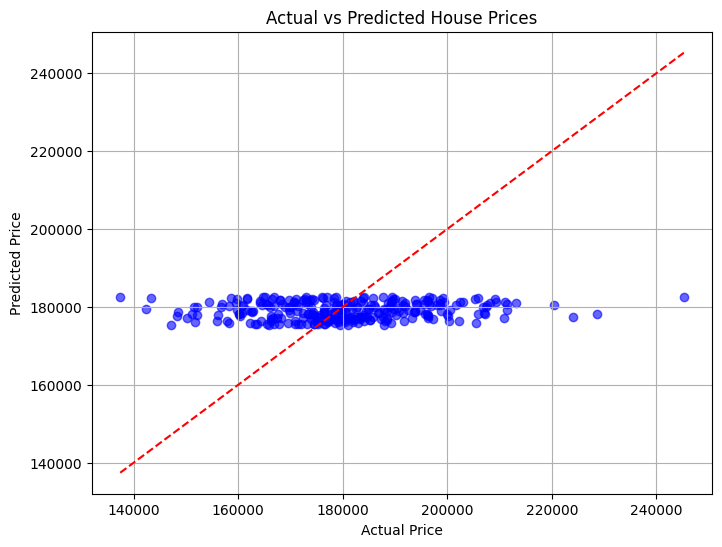

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
